<a href="https://colab.research.google.com/github/changhorang/SSAC_study/blob/main/DL/05_DNN_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'malgun gothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

## 학습 결과 시각화 함수

In [4]:
def plot_loss(epochs, history):
  """
  학습 loss 시각화 하는 함수
  """
  plt.figure(figsize=(8, 7))
  plt.plot(range(1, epochs+1), history.history['loss'], label='train loss')
  plt.plot(range(1, epochs+1), history.history['val_loss'], label='validataion loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [5]:
def plot_accuracy(epochs, history):
  """
  학습 accuracy 시각화 하는 함수
  """
  plt.figure(figsize=(8, 7))
  plt.plot(range(1, epochs+1), history.history['accuracy'], label='train accuracy')
  plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='validataion accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## 데이터 로딩

In [6]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

## 하이퍼파라미터 변수 정의

In [8]:
lr = 1e-3
epochs = 20
batchs = 100

# data num
n_train = train_image.shape[0]
n_test = test_image.shape[0]

## 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류 문제이므로)

In [9]:
X_train = (train_image/255.).astype('float32')
X_test = (test_image/255.).astype('float32')

In [10]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [11]:
# check
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [12]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Dataset 생성

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(n_train).batch(batchs)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batchs)

## 모델의 크기 변경

In [14]:
# 작은 모델
def create_small_model():
  # create model
  model = keras.Sequential()

  # hidden layer
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(8, activation='relu'))

  # output layer
  model.add(layers.Dense(10, activation='softmax'))
  
  return model

In [15]:
# model 생성 & 컴파일
small_model = create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [16]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8)                 6280      
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


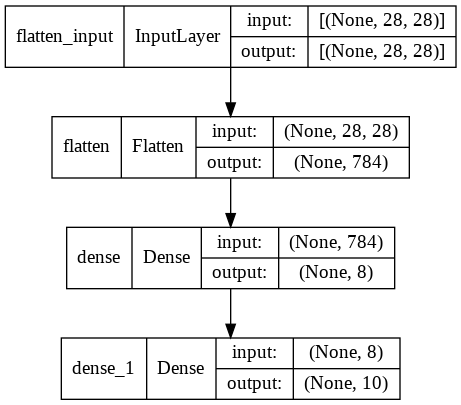

In [17]:
keras.utils.plot_model(small_model, show_shapes=True)

In [18]:
hist = small_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 4s 3ms/step - loss: 0.7702 - accuracy: 0.7874 - val_loss: 0.3830 - val_accuracy: 0.8983
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3559 - accuracy: 0.9017 - val_loss: 0.3180 - val_accuracy: 0.9133
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3173 - accuracy: 0.9113 - val_loss: 0.3055 - val_accuracy: 0.9145
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3007 - accuracy: 0.9156 - val_loss: 0.2921 - val_accuracy: 0.9203
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2899 - accuracy: 0.9191 - val_loss: 0.2870 - val_accuracy: 0.9233
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2822 - accuracy: 0.9215 - val_loss: 0.2810 - val_accuracy: 0.9226
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2764 - accuracy: 0.9229 - val_loss: 0.2792 - val_accuracy: 0.9227
Epoch 

findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['malgun gothic'] not found. Falling back to DejaVu Sans.


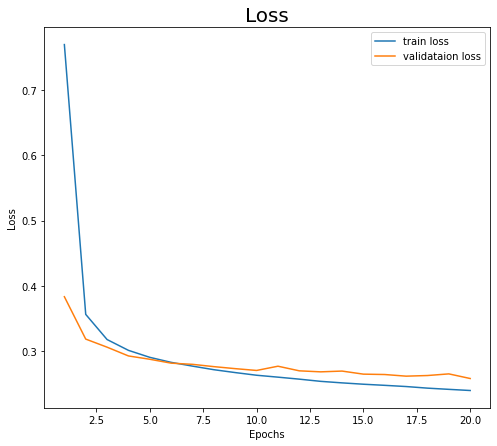

In [19]:
plot_loss(epochs, hist)

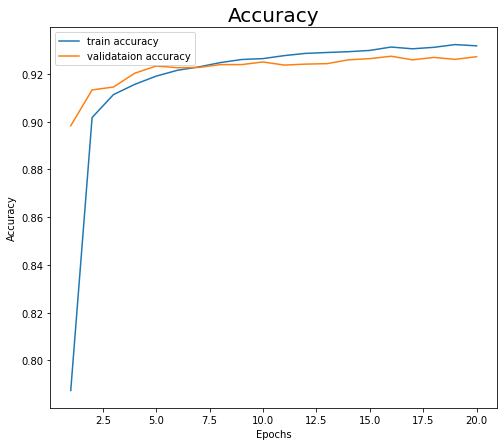

In [20]:
plot_accuracy(epochs, hist)

In [21]:
# 모델의 크기를 크게
# MLP - unit 개수 : 2제곱, 큰값에서 점점 줄여나간다
def create_bigger_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [22]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [23]:
hist = bigger_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2490 - accuracy: 0.9251 - val_loss: 0.1240 - val_accuracy: 0.9605
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0944 - accuracy: 0.9711 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0737 - val_accuracy: 0.9786
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0480 - accuracy: 0.9841 - val_loss: 0.0780 - val_accuracy: 0.9774
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0399 - accuracy: 0.9871 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0737 - val_accuracy: 0.9804
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0817 - val_accuracy: 0.9789
Epoch 

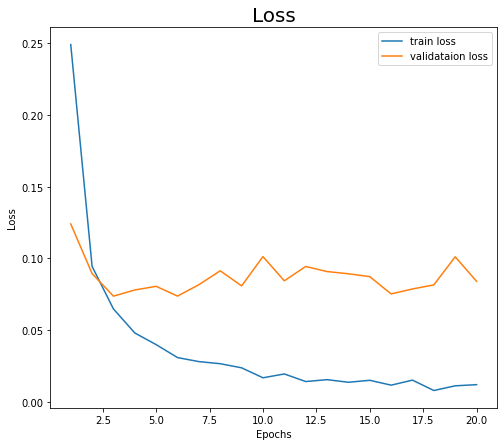

In [24]:
plot_loss(epochs, hist)

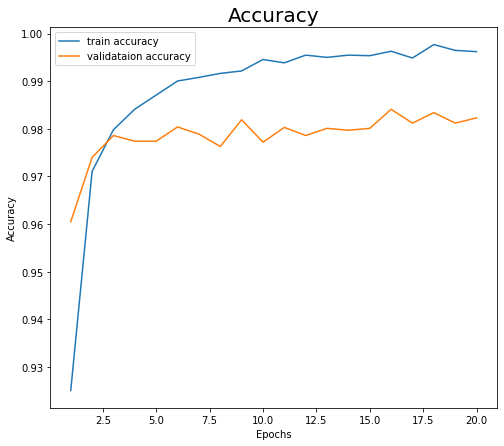

In [25]:
plot_accuracy(epochs, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
- dropout node를 가질 Layer 앞에 추가
- 학습 시킬 파라미터는 없음

In [26]:
def create_dropout_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  
  model.add(layers.Dropout(0.5)) # 다음 레이어의 노드들중 일부를 dropout 시킨다
  model.add(layers.Dense(256, activation='relu'))
  
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(256, activation='relu'))

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128, activation='relu'))
  
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [27]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
dropout_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [28]:
hist = dropout_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
# loss가 train보다 val 쪽이 낮음은 overfitting 해소를 의미함

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.7620 - accuracy: 0.7444 - val_loss: 0.2316 - val_accuracy: 0.9324
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4084 - accuracy: 0.8751 - val_loss: 0.1702 - val_accuracy: 0.9475
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3367 - accuracy: 0.8985 - val_loss: 0.1456 - val_accuracy: 0.9576
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3001 - accuracy: 0.9094 - val_loss: 0.1200 - val_accuracy: 0.9647
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2805 - accuracy: 0.9156 - val_loss: 0.1144 - val_accuracy: 0.9664
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.2639 - accuracy: 0.9217 - val_loss: 0.1064 - val_accuracy: 0.9681
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2469 - accuracy: 0.9260 - val_loss: 0.1051 - val_accuracy: 0.9698
Epoch 

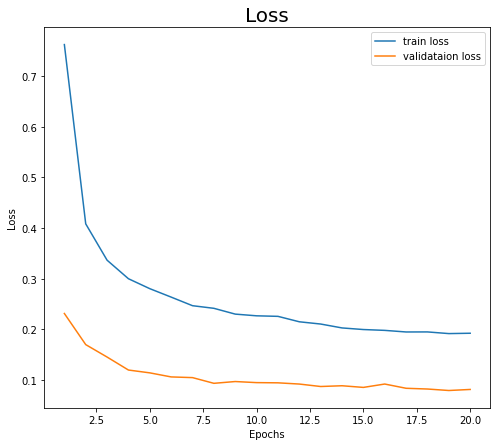

In [29]:
plot_loss(epochs, hist)

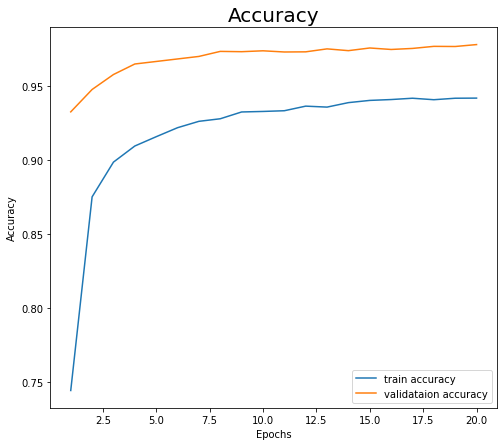

In [30]:
plot_accuracy(epochs, hist)

## Batch Normalization
- Dense -> BN -> Activation func. 순서로 적용
- layers.BatchNormalization 사용

In [31]:
def create_bn_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))

  model.add(layers.Dense(256)) # unit만 지정 / activation 생략
  model.add(layers.BatchNormalization()) # BN
  model.add(layers.ReLU()) # activation func.

  # model.add(layers.Dropout(0.5))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dense(10))
  model.add(layers.BatchNormalization())
  model.add(layers.Softmax())

  # 참고 'sigmoid'(이진분류 케이스)는 layers.Activation(activation='sigmoid') 를 이용

  return model

In [32]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
bn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [33]:
hist = bn_model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.4134 - accuracy: 0.9383 - val_loss: 0.2112 - val_accuracy: 0.9722
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1797 - accuracy: 0.9740 - val_loss: 0.1298 - val_accuracy: 0.9767
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1139 - accuracy: 0.9818 - val_loss: 0.0911 - val_accuracy: 0.9807
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0788 - accuracy: 0.9870 - val_loss: 0.0739 - val_accuracy: 0.9822
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0587 - accuracy: 0.9899 - val_loss: 0.0718 - val_accuracy: 0.9815
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0446 - accuracy: 0.9924 - val_loss: 0.0775 - val_accuracy: 0.9802
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0356 - accuracy: 0.9935 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 

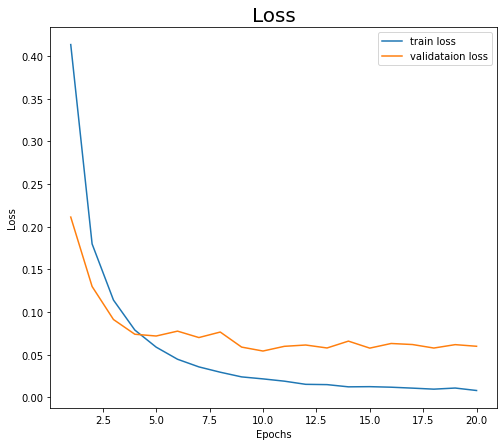

In [34]:
plot_loss(epochs, hist)

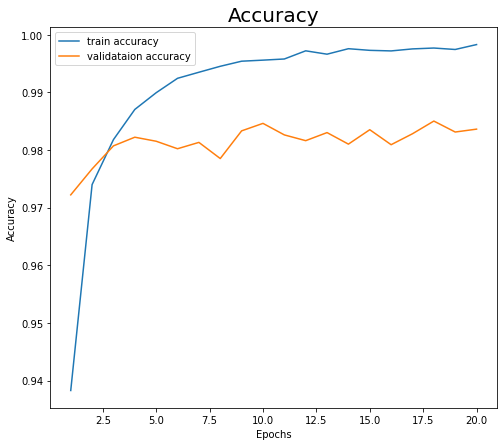

In [35]:
plot_accuracy(epochs, hist)

## Learning rate 조정을 이용한 성능 향상

### Learning Rate Decay
- 일정한 step 마다 learning rate를 조정

In [36]:
def create_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [37]:
model = create_model()

In [38]:
len(train_dataset)

600

In [39]:
# optimizer의 learning_rate를 상수 대신 LearningRate scheduler 객체로 설정
# ExponentialDecay - 일정한 간격(step기준)마다 lr을 변경
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=lr, # start lr
                    decay_steps=len(train_dataset)*5, # 몇 step마다 변경할 지 (5 epoch마다 변경)
                    decay_rate=0.5, # 변화율 (decay_rate 값을 현재 lr에 곱해줌)
                    staircase=True, # lr값이 계단식으로 변화 (False인 경우 점진적으로 감소, 일반적으로 True)
                    )

In [40]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2546 - accuracy: 0.9248 - val_loss: 0.1234 - val_accuracy: 0.9621
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0954 - accuracy: 0.9710 - val_loss: 0.0870 - val_accuracy: 0.9725
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0798 - val_accuracy: 0.9755
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0697 - val_accuracy: 0.9815
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0647 - val_accuracy: 0.9830
Epoch 

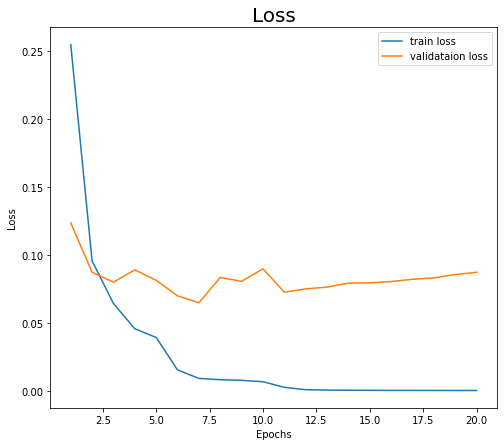

In [42]:
plot_loss(epochs, hist)

### Callback을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
  - 학습 시 성능이 개선이 안되는 경우 lr을 조정

In [43]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss', # 성능개선과 관련해 볼 평가지표
                          factor=0.5, # lr 조정 비율 (현재 lr*factor)
                          patience=3, # 성능 개선이 안될 때, 몇 epoch까지 기다릴 지 지정 (general=10~)
                          mode='min', # monitor의 값이 어떨 때 성능 개선 되는지 (min=작을 수록, max=클수록, auto=자동으로)
                          verbose=2) # 학습률 변화시 로그 남기기

In [45]:
hist = model.fit(train_dataset, epochs=epochs,
                 validation_data=test_dataset, callbacks=[lr_cb])
                                              # 학습 때 처리할 callback들 등록

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2443 - accuracy: 0.9287 - val_loss: 0.1253 - val_accuracy: 0.9617 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0934 - accuracy: 0.9711 - val_loss: 0.0939 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0654 - accuracy: 0.9792 - val_loss: 0.0817 - val_accuracy: 0.9749 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0937 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0809 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9898 - val_loss: 0.0844 - val_accuracy: 0.9771 - lr: 0.0010
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - lo

## MNIST 예측 모델 네트워크 정의 및 성능 개선

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [47]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [48]:
epochs = 80
batchs = 100
lr = 1e-3

n_train = train_image.shape[0]
n_test = test_image.shape[0]

In [49]:
X_train = (train_image/255.).astype('float32')
X_test = (test_image/255.).astype('float32')

y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [50]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(n_train).batch(batchs)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batchs)

In [51]:
def mnist_model():
  model = keras.Sequential()

  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(1024))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(512))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(32))
  model.add(layers.BatchNormalization())
  model.add(layers.ReLU())

  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(10))
  model.add(layers.BatchNormalization())
  model.add(layers.Softmax())

  return model

In [52]:
model = mnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout_4 (Dropout)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                      

In [53]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_cb2 = ReduceLROnPlateau(monitor='val_loss', # 성능개선과 관련해 볼 평가지표
                          factor=0.5, # lr 조정 비율 (현재 lr*factor)
                          patience=5, # 성능 개선이 안될 때, 몇 epoch까지 기다릴 지 지정 (general=10~)
                          mode='min', # monitor의 값이 어떨 때 성능 개선 되는지 (min=작을 수록, max=클수록, auto=자동으로)
                          verbose=2) # 학습률 변화시 로그 남기기

In [54]:
hist = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, callbacks=[lr_cb2])

Epoch 1/80
600/600 [==============================] - 5s 6ms/step - loss: 0.7762 - accuracy: 0.8292 - val_loss: 0.2196 - val_accuracy: 0.9586 - lr: 0.0010
Epoch 2/80
600/600 [==============================] - 4s 6ms/step - loss: 0.4056 - accuracy: 0.9182 - val_loss: 0.1329 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 3/80
600/600 [==============================] - 4s 6ms/step - loss: 0.3011 - accuracy: 0.9358 - val_loss: 0.1082 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 4/80
600/600 [==============================] - 4s 6ms/step - loss: 0.2546 - accuracy: 0.9424 - val_loss: 0.0895 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 5/80
600/600 [==============================] - 4s 6ms/step - loss: 0.2233 - accuracy: 0.9477 - val_loss: 0.0775 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 6/80
600/600 [==============================] - 4s 6ms/step - loss: 0.2004 - accuracy: 0.9534 - val_loss: 0.0765 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 7/80
600/600 [==============================] - 4s 6ms/step - lo

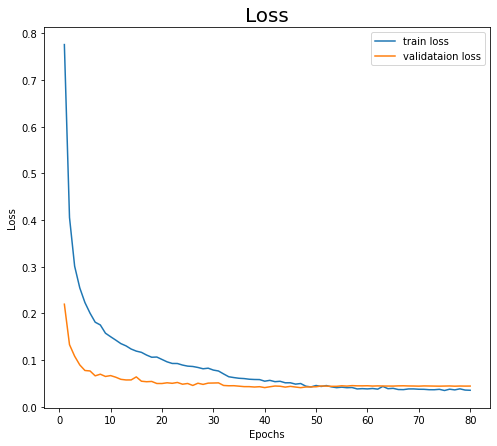

In [55]:
plot_loss(epochs, hist)

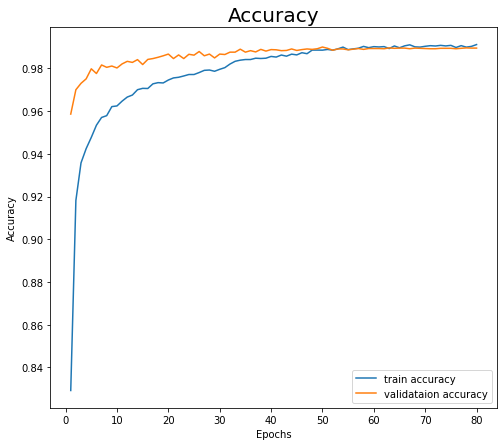

In [56]:
plot_accuracy(epochs, hist)

In [58]:
model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9895


[0.04412883520126343, 0.9894999861717224]